In [3]:
from google.colab import drive
drive.mount ('/content/drive')

## random comment

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import (
    linear_model, metrics, pipeline, preprocessing, model_selection
)
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [37]:
#from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [4]:
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1 - Data Science/Project/compas-scores-two-years.csv")
print(raw_data.shape)
raw_data.columns

(7214, 53)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [23]:
raw_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [25]:
# raw_data.isna().sum()

Short comparison to other CSVs

In [29]:
parsed_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1 - Data Science/Project/cox-parsed.csv")
print(parsed_data.shape)
parsed_data.columns 

(13419, 52)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

how is this dataset diffrent: number of rows is bigger (names double if diffrent), but columns are the same

In [30]:
parsed_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0
1,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,334,961,0
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0
4,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,63,64,1


# Data Cleaning

In [8]:
df = raw_data.loc[
    (raw_data['days_b_screening_arrest'] <= 30) &
    (raw_data['days_b_screening_arrest'] >= -30) &
    (raw_data['is_recid'] != -1) &
    (raw_data['c_charge_degree'] != "O") &
    (raw_data['score_text'] != "N/A")
]
len(df)

6172

# Exploratory Analysis

In [9]:
df['race'].value_counts()

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64

In [10]:
# Race by Score Text
pd.crosstab(df['score_text'],df['race'])

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
score_text,,,,,,
High,845,3,223,47,4,22
Low,1346,24,1407,368,3,273
Medium,984,4,473,94,4,48


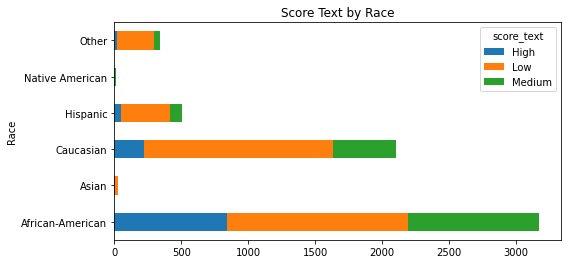

In [11]:
score_text_by_race = df.groupby(['race','score_text'], sort = True)['id'].size()
score_text_by_race.unstack().plot(
    kind = "barh", 
    title = "Score Text by Race",
    ylabel = "Score Text",
    xlabel = "Race",
    figsize = (8,4),
    stacked = True
)

In [12]:
df = df.loc[df['race'].isin(["African-American","Caucasian","Hispanic"])]

In [13]:
#calculate the total and proportions of score texts in each race group
score_text_by_race_prop= df.groupby(['race', 'score_text']).agg({'score_text': 'count'})
score_text_by_race_prop['prop'] = score_text_by_race_prop.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
score_text_by_race_prop

score_text       prop
race             score_text                       
African-American High               845  26.614173
                 Low               1346  42.393701
                 Medium             984  30.992126
Caucasian        High               223  10.603899
                 Low               1407  66.904422
                 Medium             473  22.491679
Hispanic         High                47   9.233792
                 Low                368  72.298625
                 Medium              94  18.467583

In [14]:
df.groupby('race')['decile_score'].mean()

race
African-American    5.276850
Caucasian           3.635283
Hispanic            3.383104
Name: decile_score, dtype: float64

# Distribution of decile scores

Text(0, 0.5, 'Count')

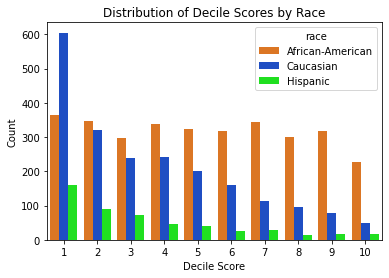

In [15]:
sns.countplot(
    data = df,
    x = 'decile_score',
    hue = 'race',
    palette = ["#F97306","#0343DF","#00FF00"]
)
plt.title('Distribution of Decile Scores by Race')
plt.xlabel('Decile Score')
plt.ylabel('Count')

# COMPAS Score Prediction
## Linear Regression Model

In [16]:
features = pd.concat(
    [pd.get_dummies(df.age_cat, prefix='age'),
     pd.get_dummies(df.sex, prefix='sex'),
     pd.get_dummies(df.c_charge_degree, prefix='degree'), # felony or misdemeanor charge ('f' or 'm')
     df.priors_count],
    axis=1)

# drop one less dummy variable
features.drop(['age_25 - 45', 'sex_Female', 'degree_M'], axis=1, inplace=True)

# predict the Decile Score
target = df.decile_score

In [65]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    

## Lasso

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.25, random_state = 3)

In [53]:
alphas = 10**np.linspace(10,-2,1000)*0.5 #why?, why not make 0.95 in the first place?
#print(alphas)
#https://numpy.org/devdocs/reference/generated/numpy.linspace.html

In [63]:
# Lasso Model
# find the best alpha
lasso = linear_model.LassoCV(alphas = alphas, cv = 10, max_iter = 100000) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv = lasso.fit(X_train,y_train)

lasso_predict = lasso_cv.predict(X_test)
lasso_mse = metrics.mean_squared_error(y_test, lasso_predict)
lasso_mse 

5.104624247324706

In [64]:
lasso_cv.alpha_

0.005

In [67]:
#accuracy of lasso
lasso_MAPE = MAPE(y_test,lasso_predict) #(Mean Absolute Percentage Error) 
print("MAPE value lasso Regression: ",lasso_MAPE)
lasso_Accuracy = 100 - lasso_MAPE
print('Accuracy of lasso Regression: {:0.2f}%.'.format(lasso_Accuracy))

MAPE value lasso Regression:  64.817917841534
Accuracy of lasso Regression: 35.18%.


In [ ]:
#why both? do I see which variables are excluded by lasso in this case?
#Accuracy of Ridge is slightly better

## Ridge

In [70]:
#with alpha from lasso
ridge = linear_model.Ridge(alpha = lasso_cv.alpha_, normalize = True) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
ridge_model = ridge.fit(X_train, y_train) #that's with alpha=1.0

ridge_predict = ridge_model.predict(X_test)
ridge_mse = metrics.mean_squared_error(y_test, ridge_predict)
ridge_mse 

5.100613454127368

In [62]:
#ridge scheint nur mit einem alpha zu gehen und nicht mit alphas?

In [45]:
Ridge_MAPE = MAPE(y_test,ridge_predict)
print("MAPE value: ",Ridge_MAPE)
Accuracy = 100 - Ridge_MAPE
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

#source: https://www.askpython.com/python/examples/ridge-regression
#also interesting source: https://www.statology.org/ridge-regression-in-python/

MAPE value:  64.73061110223645
Accuracy of Ridge Regression: 35.27%.


In [38]:
'''clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#source: https://www.w3schools.com/python/python_ml_cross_validation.asp'''

Cross Validation Scores:  [0.24137931 0.24827586 0.25259516 0.27681661 0.22145329]
Average CV Score:  0.24810404486338147
Number of CV Scores used in Average:  5


## Interpretation of MSE

Advantages of using MSE
*  Easy to calculate in Python
*  Simple to understand calculation for end users
*  Designed to punish large errors

Disadvantages of using MSE
*  Error value not given in terms of the target
*  Difficult to interpret
*  Not comparable across use cases

What is a good MSE value?
The closer your MSE value is to 0, the more accurate your model is. However, there is no 'good' value for MSE. It is an absolute value which is unique to each dataset and can only be used to say whether the model has become more or less accurate than a previous run.

Can MSE be used to compare models?
MSE cannot be used to compare different models from different datasets as it’s an absolute value that is only relevant to that given dataset. If you need to compare models across different datasets then it would be best to use percentage metrics such as MAPE.

source: https://stephenallwright.com/good-mse-value/

## Interpretation of MAPE

MAPE (Mean Absolute Percentage Error) is a common regression machine learning metric, but it can be confusing to know what a good score actually is. In this post, I explain what MAPE is, what a good score is, and answer some common questions that people have.

What is MAPE?
Mean Absolute Percentage Error (MAPE) is the mean of all absolute percentage errors between the predicted and actual values.

It is a popular metric to use as it returns the error as a percentage, making it both easy for end users to understand and simple to compare model accuracy across use cases and datasets.

Positives of using MAPE as a metric
*  Easy for end users to understand as the error is a percentage
*  Possible to compare model accuracy across datasets and use cases
*  Easily implemented in Python

Negatives of using MAPE as a metric
*  Not possible to use when actual values can be at or close to zero

When to use MAPE?
MAPE should be used when either communicating results to end users is important or when you need to be able to compare your results with other models. It shouldn’t be used when you have actual values that are close to or at zero due to the division by zero error.

source: https://stephenallwright.com/good-mape-score/